<h1> Import the Data </h1>

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import unicodedata
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import operator
from nltk.corpus import sentiwordnet as swn
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import string
#nltk.download('stopwords')
#nltk.download('sentiwordnet')
#nltk.download('wordnet')

In [2]:
df = pd.read_csv('./../train_E6oV3lV.csv',dtype=np.str,encoding='utf-8')
df.head()

id label                                              tweet
0  1     0   @user when a father is dysfunctional and is s...
1  2     0  @user @user thanks for #lyft credit i can't us...
2  3     0                                bihday your majesty
3  4     0  #model   i love u take with u all the time in ...
4  5     0             factsguide: society now    #motivation

<h3> Get info on the data </h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null object
label    31962 non-null object
tweet    31962 non-null object
dtypes: object(3)
memory usage: 749.2+ KB


In [4]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

<h3> Get the count of sarcastic and non sarcastic tweets </h3>

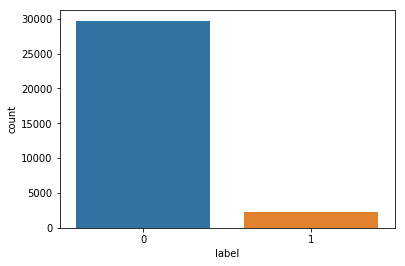

In [5]:
sns.countplot(df['label'])

<h3> Get the value count of sarcastic and non sarcastic tweets data </h3>

In [6]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
df['cleaned_tweet']=df['tweet'].copy()
df['LCUC']=df['cleaned_tweet'].apply(lambda x: (len(x)))

In [8]:
df['cleaned_tweet']=df['cleaned_tweet'].apply(lambda x : unicodedata.normalize('NFD', x))
df['cleaned_tweet']=df['cleaned_tweet'].apply(lambda x : x.encode('ascii', 'ignore'))
df['cleaned_tweet']=df['cleaned_tweet'].apply(lambda x : x.decode("utf-8"))

In [9]:
df['LCUC1']=df['cleaned_tweet'].apply(lambda x: (len(x)))
df['LCUCF']=df['LCUC']-df['LCUC1']
del df['LCUC']
del df['LCUC1']

In [10]:
df['cleaned_tweet'].replace(("&amp;")," ",regex=True,inplace=True)
df['cleaned_tweet'].replace(("@user")," ",regex=True,inplace=True)
df['cleaned_tweet'].replace(('#'),' ',regex=True,inplace=True)
df['cleaned_tweet'].replace(('~'),' ',regex=True,inplace=True)

In [11]:
string.punctuation.replace('!"#','"')


'"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
df['NoEx'] = df['tweet'].apply(lambda x: (x.count('!')))
#df['NoQues'] = df['tweet'].apply(lambda x: (x.count('?')+x.count('*')+x.count('&')+x.count('$')+x.count('\"')+x.count('.')+x.count('@')+x.count(',')))
df['NoQues'] = df['tweet'].apply(lambda x: len([i for i in x if i in string.punctuation.replace('!"#','"')]))
#df['NoA'] = df['tweet'].apply(lambda x: (x.count('*')))
#df['NoDlr'] = df['tweet'].apply(lambda x: (x.count('$')))
#df['NoQ'] = df['tweet'].apply(lambda x: (x.count('\"')))
#df['NoDt'] = df['tweet'].apply(lambda x: (x.count('.')))
#df['NoC'] = df['tweet'].apply(lambda x: (x.count(',')))
#df['NoAR'] = df['tweet'].apply(lambda x: (x.count('@')))
df['NoHash'] = df['tweet'].apply(lambda x: (x.count('#')))
df['No_LSlang'] = df['tweet'].apply(lambda x: len(re.findall(r'(wow|ahh?!|omg|butlol?z|rofl|lmao|lol?z|haha|[$$]sar[$$])', x.lower())))

<h3> Remove Special Characters </h3>

In [13]:

urlpt=df["cleaned_tweet"]
special_char_list = ['\.', '\;', '\?', '\}', '\)', '\{', '\(','/','\-','\#','\!','\"','\=','\*','\_','\:','\|','\,','\$','\@','\%','\^','\&','\+','\<','\>','\`','\~','\[','\]']
for special_char in special_char_list:
    urlpt = urlpt.replace(special_char, ' ',regex=True)
df["cleaned_tweet"]=urlpt

<h3> Find the stopwords and create filtered sentence </h3>

In [14]:
stop_words=set(stopwords.words('english'))
snowball = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

In [15]:
tknzr = TweetTokenizer()
df['Tokenized'] = df['cleaned_tweet'].apply(lambda x:  [w for w in word_tokenize(x) if not w in stop_words])
df['Tokenized'] = df['Tokenized'].apply(lambda x : [snowball.stem(word) for word in x])
df['Tokenized'] = df['Tokenized'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])
df['ListLength'] = df['Tokenized'].apply(lambda x: len(x))

In [16]:
df['HW'] = df['tweet'].apply(lambda x: [w.replace('#','') for w in list(re.findall(r'(#[A-za-z0-9]*)', x.lower()))])
df['HW'] = df['HW'].apply(lambda x:  [w for w in x if not w in stop_words])
df['HW'] = df['HW'].apply(lambda x : [snowball.stem(word) for word in x])
df['HW'] = df['HW'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])
df['HW']=df['HW'].apply(lambda x : " ".join(w for w in x))

In [17]:
df.head(10)

id label                                              tweet  \
0   1     0   @user when a father is dysfunctional and is s...   
1   2     0  @user @user thanks for #lyft credit i can't us...   
2   3     0                                bihday your majesty   
3   4     0  #model   i love u take with u all the time in ...   
4   5     0             factsguide: society now    #motivation   
5   6     0  [2/2] huge fan fare and big talking before the...   
6   7     0   @user camping tomorrow @user @user @user @use...   
7   8     0  the next school year is the year for exams.ð...   
8   9     0  we won!!! love the land!!! #allin #cavs #champ...   
9  10     0   @user @user welcome here !  i'm   it's so #gr...   

                                       cleaned_tweet  LCUCF  NoEx  NoQues  \
0     when a father is dysfunctional and is so se...      0     0       2   
1      thanks for  lyft credit i can't use cause ...      0     0       5   
2                                bihday your majesty      0     0       0   
3   model   i love u take with u all the time in ...     32     3       0   
4             factsguide  society now     motivation      0     0       1   
5   2 2  huge fan fare and big talking before the...      0     0       5   
6              camping tomorrow               dannya      2     0       8   
7  the next school year is the year for exams  ca...      8     0       2   
8  we won    love the land     allin  cavs  champ...      2     6       0   
9              welcome here    i'm   it's so  gr8         0     2       4   

   NoHash  No_LSlang                                          Tokenized  \
0       1          0  [father, dysfunct, selfish, drag, kid, dysfunc...   
1       3          0  [thank, lyft, credit, ca, n't, use, caus, n't,...   
2       0          0                                  [bihday, majesti]   
3       1          0                [model, love, u, take, u, time, ur]   
4       1          0                        [factsguid, societi, motiv]   
5       1          0  [2, 2, huge, fan, fare, big, talk, leav, chao,...   
6       0          0                           [camp, tomorrow, dannya]   
7       7          0  [next, school, year, year, exam, ca, n't, thin...   
8       5          0  [love, land, allin, cav, champion, cleveland, ...   
9       1          0                              [welcom, 'm, 's, gr8]   

   ListLength                                                 HW  
0           7                                                run  
1          14                            lyft disapoint getthank  
2           2                                                     
3           7                                              model  
4           3                                              motiv  
5          13                                     allshowandnogo  
6           3                                                     
7          15  school exam hate imagin actorslif revolutionsc...  
8           7       allin cav champion cleveland clevelandcavali  
9           4                                                gr8

<h3> Separate Sarcastic and Non Sarcastic </h3>

In [18]:
df_0 = df[df.label == '0'].copy()
df_1 = df[df.label == '1'].copy()

(-0.5, 399.5, 199.5, -0.5)

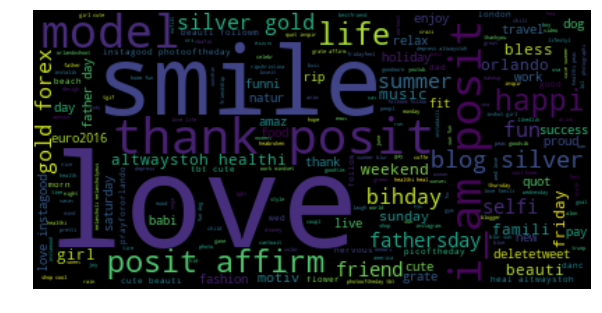

In [19]:
textall0 = " ".join(df_0['HW'])
wordcloud_0 = WordCloud().generate(textall0)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

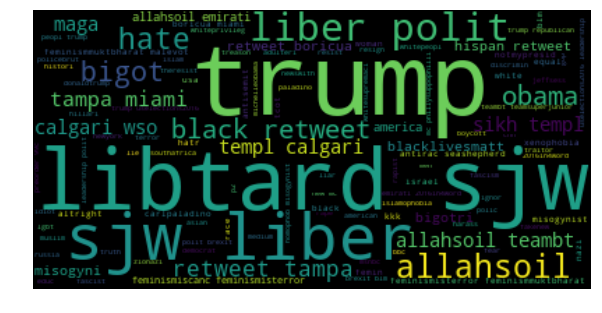

In [20]:
textall1 = " ".join(df_1['HW'])
wordcloud_1 = WordCloud().generate(textall1)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis("off")

In [21]:
sorted_0 = sorted(wordcloud_0.words_.items(), key=operator.itemgetter(1),reverse=True)
sorted_1 = sorted(wordcloud_1.words_.items(), key=operator.itemgetter(1),reverse=True)
T_0HW1=[w[0] for w in sorted_0[:200]] 
T_1HW1=[w[0] for w in sorted_1[:200]]
RW= [w for w in T_0HW1 if w in T_1HW1]
print(RW)

T_0HW=[s for s in [w[0] for w in sorted_0[:200]]  if s not in ['lgbt', 'usa', 'woman', 'trump', 'nyc', 'america','truth','peac']]
T_1HW=[s for s in [w[0] for w in sorted_1[:200]]  if s not in ['love','new']]

RW= [w for w in T_0HW if w in T_1HW]
print(RW)
print(len(T_0HW))
print(T_1HW)


['love', 'new', 'truth', 'lgbt', 'peac', 'usa', 'woman', 'trump', 'nyc', 'america']
[]
192
['trump', 'libtard sjw', 'sjw liber', 'liber polit', 'allahsoil', 'hate', 'bigot', 'obama', 'black retweet', 'retweet tampa', 'tampa miami', 'sikh templ', 'templ calgari', 'calgari wso', 'allahsoil teambt', 'maga', 'hispan retweet', 'retweet boricua', 'misogyni', 'bigotri', 'blacklivesmatt', 'allahsoil emirati', 'america', 'feminismiscanc feminismisterror', 'feminismisterror feminismmuktbharat', 'feminismmuktbharat malevot', 'altright', 'hatr', 'notmypresid', 'white', 'antirac seashepherd', 'nazi', 'blm', 'carlpaladino', 'tcot', 'race', 'black', 'misogynist', 'israel', 'usa', 'woman', 'femin', 'kkk', 'xenophobia', 'antisemit', 'equal', 'boricua miami', 'teambt teamsuperjunior', 'trump uselections2016', 'uselections2016 leadership', 'leadership polit', 'polit brexit', 'brexit blm', 'resist', 'fascism', 'american', 'peopl trump', 'trump republican', 'medium', 'traitor', 'liar', 'fascist', 'whitepeo

In [22]:
df['No_HW0']=df['HW'].apply(lambda x: len(list(filter(lambda k: True if k in T_0HW else False,x.split(' ')))))
df['No_HW1']=df['HW'].apply(lambda x: len(list(filter(lambda k: True if k in T_1HW else False,x.split(' ')))))

In [23]:
def countpn(df):
    
    senti_score = []
    pos_score = []
    neg_score = []
    TS_score = [] 
    for i in df.Tokenized:
        tagged = nltk.pos_tag(i)
        pos=0
        neg=0
        obj=0
        count=0
        count_pos = 0
        count_neg = 0
        TS=0
        for word, tag in tagged:
            ss_set = None
            tag=tag.lower()
            if tag.startswith('v'):
                tag = 'v'
            elif tag.startswith('n'):
                tag = 'n'
            elif tag.startswith('j'):
                tag = 'a'
            elif tag.startswith('rb'):
                tag = 'r'
            if tag in ('a', 'n', 'r', 'v'):
                ss_set = list(swn.senti_synsets(word,tag))
            else:
                ss_set = list(swn.senti_synsets(word))
            if len(ss_set) != 0:
                pos=ss_set[0].pos_score()
                neg=ss_set[0].neg_score()
                if np.abs(pos) > np.abs(neg):
                    count_pos += 1
                if np.abs(neg) > np.abs(pos):
                    count_neg += 1
                TS=TS+pos+neg
            pos = 0
            neg = 0
            obj = 0
        TS_score.append(TS)
        pos_score.append(count_pos)
        neg_score.append(count_neg) 
    return TS_score,pos_score,neg_score
TS_score,pos_score,neg_score=countpn(df)
df['Positive Score'] = pos_score
df['Negative Score'] = neg_score

# Popularity of #words

In [24]:
df['LexicalPopularity'] = df['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
del df['HW']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
T0 = TfidfVectorizer(tokenizer=word_tokenize,max_features=1000, analyzer='word', stop_words='english', ngram_range=(1,2), dtype=np.float32) 
df['Tokenized1']=df['Tokenized'].apply(lambda x : " ".join(x))
t0_vec=T0.fit_transform(df[df['label']=='0'].Tokenized1)
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=1, max_iter=100,learning_method='batch',random_state=1)
lda.fit(t0_vec)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=1, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [26]:
message=list()
for topic_idx, topic in enumerate(lda.components_):
    topic=' '.join([T0.get_feature_names()[i] for i in topic.argsort()[:-500:-1]])
    message=[w for w in topic.split(' ') if w not in stop_words]
df['No_T0']=df['Tokenized'].apply(lambda x: len(list(filter(lambda k: True if k in message else False,x))))

In [27]:
T1 = TfidfVectorizer(tokenizer=word_tokenize,max_features=1000, analyzer='word', stop_words='english', ngram_range=(1,2), dtype=np.float32) 
t1_vec=T1.fit_transform(df[df['label']=='1'].Tokenized1)
from sklearn.decomposition import LatentDirichletAllocation
lda1 = LatentDirichletAllocation(n_components=1, max_iter=100,learning_method='batch',random_state=1)
lda1.fit(t1_vec)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=1, n_jobs=1, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [28]:
message1=list()
for topic_idx, topic in enumerate(lda1.components_):
    topic=' '.join([T1.get_feature_names()[i] for i in topic.argsort()[:-500:-1]])
    message1=[w for w in topic.split(' ') if w not in stop_words]
df['No_T1']=df['Tokenized'].apply(lambda x: len(list(filter(lambda k: True if k in message1 else False,x))))
del df['Tokenized1']

In [29]:
df['No_T']=df['No_T0']-df['No_T1']
df['No_T']=df['No_T'].apply(lambda x : 0 if x>=0 else 1)

In [30]:
df['Tokenized1']=df['Tokenized'].apply(lambda x : " ".join(x))

In [31]:
df.to_csv('./../clean_train_data.csv',encoding='utf-8')
df_crosscheck = pd.read_csv('./../clean_train_data.csv',encoding='utf-8')
df_crosscheck.isnull().sum()

Unnamed: 0            0
id                    0
label                 0
tweet                 0
cleaned_tweet         0
LCUCF                 0
NoEx                  0
NoQues                0
NoHash                0
No_LSlang             0
Tokenized             0
ListLength            0
No_HW0                0
No_HW1                0
Positive Score        0
Negative Score        0
LexicalPopularity     0
No_T0                 0
No_T1                 0
No_T                  0
Tokenized1           25
dtype: int64

In [32]:
df_test = pd.read_csv('./../test_tweets_anuFYb8.csv',dtype=np.str,encoding='utf-8')
df_test['cleaned_tweet']=df_test['tweet'].copy()
df_test['LCUC']=df_test['cleaned_tweet'].apply(lambda x: (len(x)))
df_test['cleaned_tweet']=df_test['cleaned_tweet'].apply(lambda x : unicodedata.normalize('NFD', x))
df_test['cleaned_tweet']=df_test['cleaned_tweet'].apply(lambda x : x.encode('ascii', 'ignore'))
df_test['cleaned_tweet']=df_test['cleaned_tweet'].apply(lambda x : x.decode("utf-8"))
df_test['LCUC1']=df_test['cleaned_tweet'].apply(lambda x: (len(x)))
df_test['LCUCF']=df_test['LCUC']-df_test['LCUC1']
del df_test['LCUC']
del df_test['LCUC1']
df_test['cleaned_tweet'].replace(("&amp;")," ",regex=True,inplace=True)
df_test['cleaned_tweet'].replace(("@user")," ",regex=True,inplace=True)
df_test['cleaned_tweet'].replace(('#'),' ',regex=True,inplace=True)
df_test['cleaned_tweet'].replace(('~'),' ',regex=True,inplace=True)

df_test['NoEx'] = df_test['tweet'].apply(lambda x: (x.count('!')))
#df['NoQues'] = df['tweet'].apply(lambda x: (x.count('?')+x.count('*')+x.count('&')+x.count('$')+x.count('\"')+x.count('.')+x.count('@')+x.count(',')))
df_test['NoQues'] = df_test['tweet'].apply(lambda x: len([i for i in x if i in string.punctuation.replace('!"#','"')]))
#df['NoA'] = df['tweet'].apply(lambda x: (x.count('*')))
#df['NoDlr'] = df['tweet'].apply(lambda x: (x.count('$')))
#df['NoQ'] = df['tweet'].apply(lambda x: (x.count('\"')))
#df['NoDt'] = df['tweet'].apply(lambda x: (x.count('.')))
#df['NoC'] = df['tweet'].apply(lambda x: (x.count(',')))
#df['NoAR'] = df['tweet'].apply(lambda x: (x.count('@')))
df_test['NoHash'] = df_test['tweet'].apply(lambda x: (x.count('#')))
df_test['No_LSlang'] = df_test['tweet'].apply(lambda x: len(re.findall(r'(wow|ahh?!|omg|butlol?z|rofl|lmao|lol?z|haha|[$$]sar[$$])', x.lower())))

urlpt=df_test["cleaned_tweet"]
special_char_list = ['\.', '\;', '\?', '\}', '\)', '\{', '\(','/','\-','\#','\!','\"','\=','\*','\_','\:','\|','\,','\$','\@','\%','\^','\&','\+','\<','\>','\`','\~','\[','\]']
for special_char in special_char_list:
    urlpt = urlpt.replace(special_char, ' ',regex=True)
df_test["cleaned_tweet"]=urlpt

df_test['Tokenized'] = df_test['cleaned_tweet'].apply(lambda x:  [w for w in tknzr.tokenize(x) if not w in stop_words])
df_test['Tokenized'] = df_test['Tokenized'].apply(lambda x : [snowball.stem(word) for word in x])
df_test['Tokenized'] = df_test['Tokenized'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])
df_test['ListLength'] = df_test['Tokenized'].apply(lambda x: len(x))
df_test['Tokenized1']=df_test['Tokenized'].apply(lambda x : " ".join(x))
df_test['HW'] = df_test['tweet'].apply(lambda x: [w.replace('#','') for w in list(re.findall(r'(#[A-za-z0-9]*)', x.lower()))])
df_test['HW'] = df_test['HW'].apply(lambda x:  [w for w in x if not w in stop_words])
df_test['HW'] = df_test['HW'].apply(lambda x : [snowball.stem(word) for word in x])
df_test['HW'] = df_test['HW'].apply(lambda x : [lemmatizer.lemmatize(word) for word in x])
df_test['HW']=df_test['HW'].apply(lambda x : " ".join(w for w in x))
df_test['No_HW0']=df_test['HW'].apply(lambda x: len(list(filter(lambda k: True if k in T_0HW else False,x.split(' ')))))
df_test['No_HW1']=df_test['HW'].apply(lambda x: len(list(filter(lambda k: True if k in T_1HW else False,x.split(' ')))))

TS_score,pos_score,neg_score=countpn(df_test)
df_test['Positive Score'] = pos_score
df_test['Negative Score'] = neg_score

#df_test['LexicalPopularity'] = TS_score
df_test['LexicalPopularity'] = df_test['cleaned_tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
del df_test['HW']
df_test['No_T0']=df_test['Tokenized'].apply(lambda x: len(list(filter(lambda k: True if k in message[0] else False,x))))
df_test['No_T1']=df_test['Tokenized'].apply(lambda x: len(list(filter(lambda k: True if k in message1[0] else False,x))))
df_test['No_T']=df_test['No_T0']-df_test['No_T1']
df_test['No_T']=df_test['No_T'].apply(lambda x : 0 if x>=0 else 1)
df_test.to_csv('./../clean_test_data.csv',encoding='utf-8')

In [33]:
col=['NoEx','NoQues','NoHash','No_LSlang','ListLength','No_HW0','No_HW1','Positive Score','Negative Score','LexicalPopularity','LCUCF','No_T']
for i in col:
    df_pt=pd.pivot_table(df,values=i,index=df['label'],columns=df[i],aggfunc=len)
    print(df_pt)
    print('************************************************************************')

NoEx        0       1       2       3      4      5     6     7     8     9   \
label                                                                          
0      22143.0  4282.0  1543.0  1077.0  364.0  112.0  96.0  38.0  22.0  13.0   
1       1901.0   264.0    52.0    15.0    3.0    2.0   3.0   1.0   1.0   NaN   

NoEx    10   11   12   13   14   15   16   19   58  
label                                               
0      5.0  4.0  3.0  6.0  5.0  3.0  2.0  1.0  1.0  
1      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
************************************************************************
NoQues      0       1       2       3       4       5       6      7      8   \
label                                                                          
0       6188.0  6687.0  5702.0  3739.0  2724.0  1796.0  1077.0  675.0  453.0   
1        263.0   325.0   403.0   429.0   315.0   191.0   120.0   89.0   47.0   

NoQues     9  ...    17   18   19   20   21   22   23   30   36   72  
la

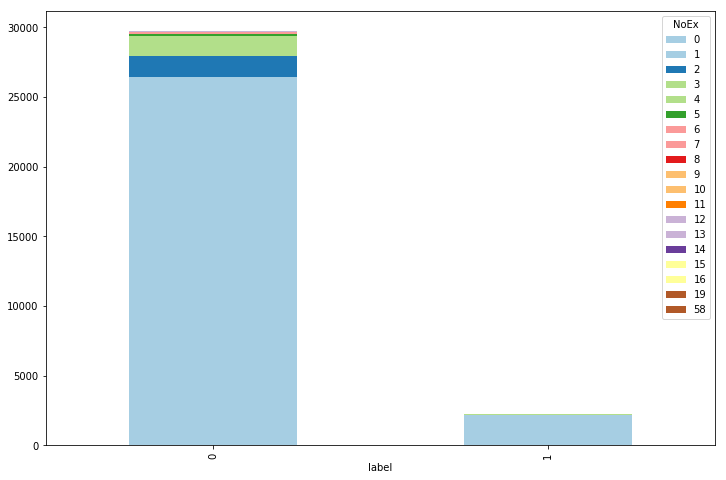

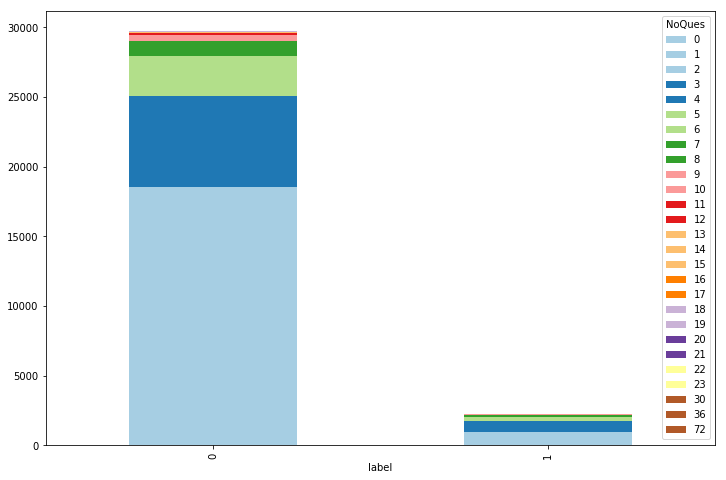

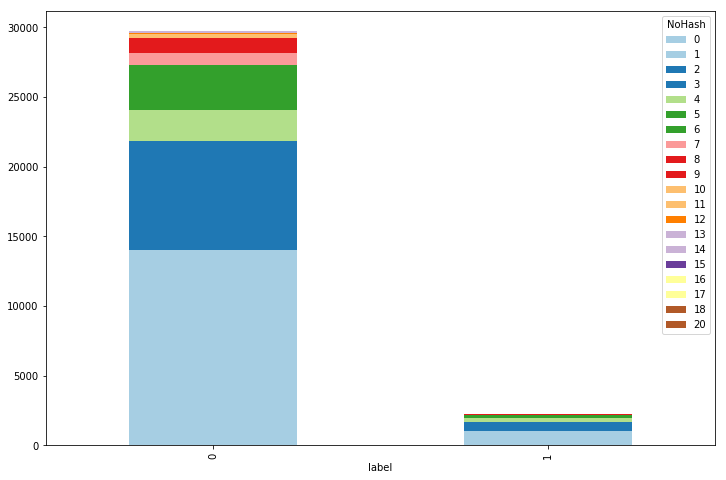

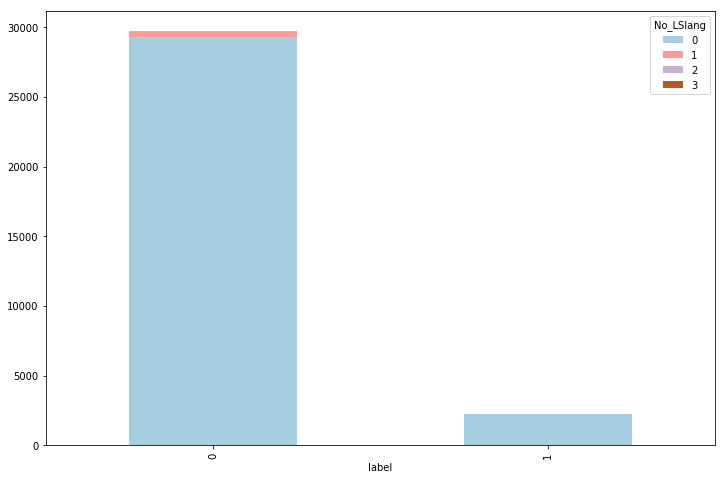

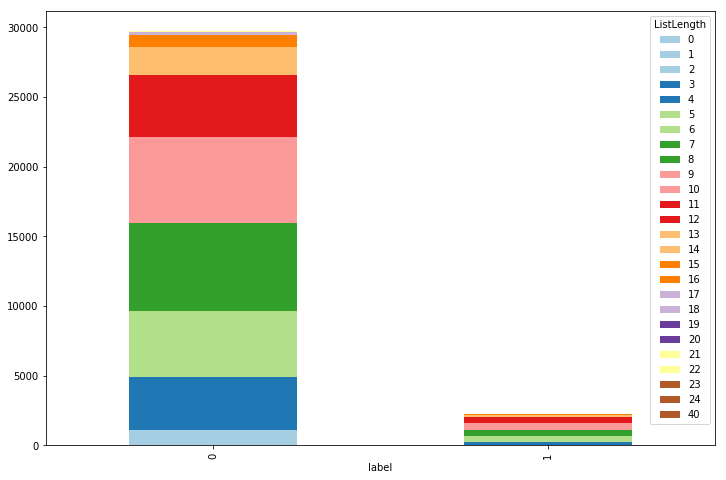

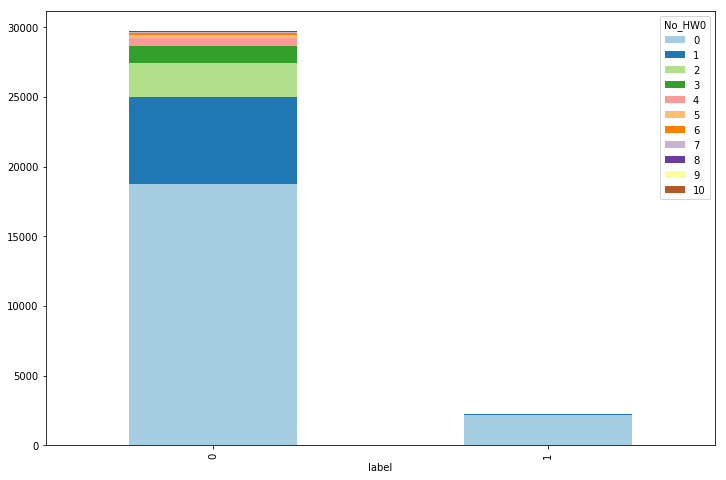

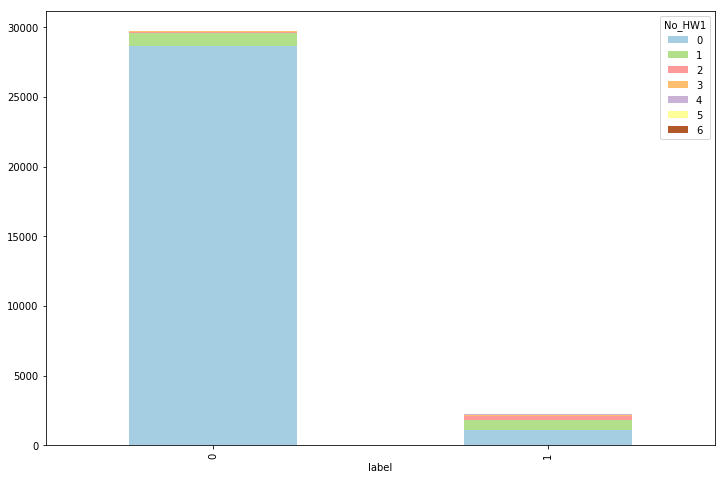

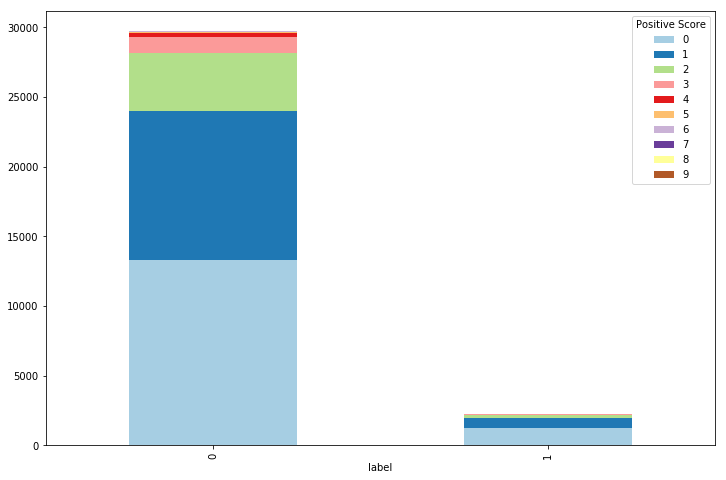

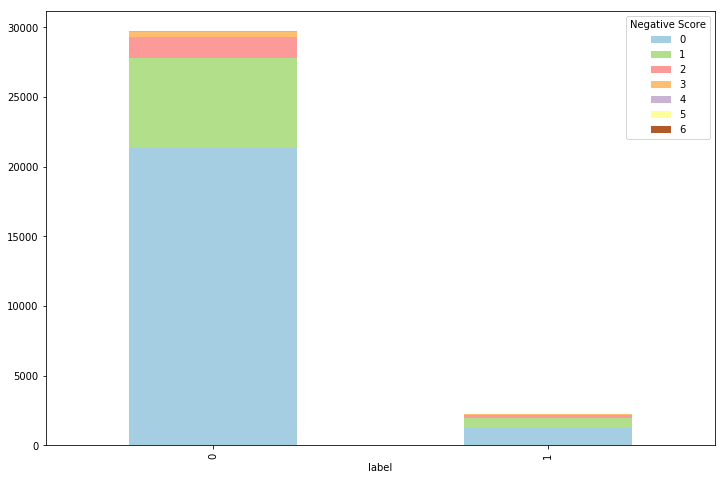

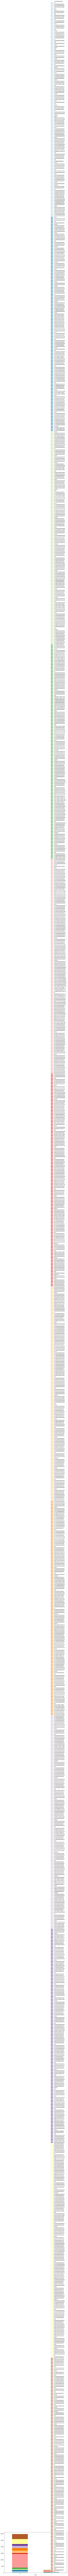

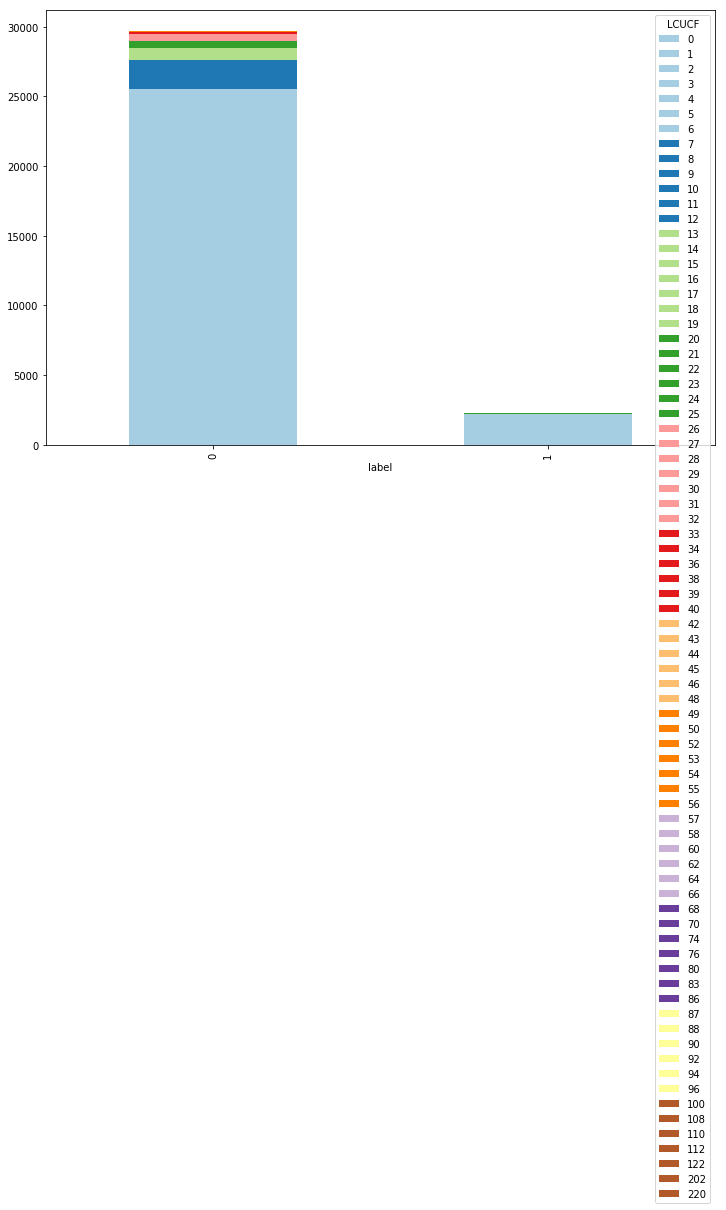

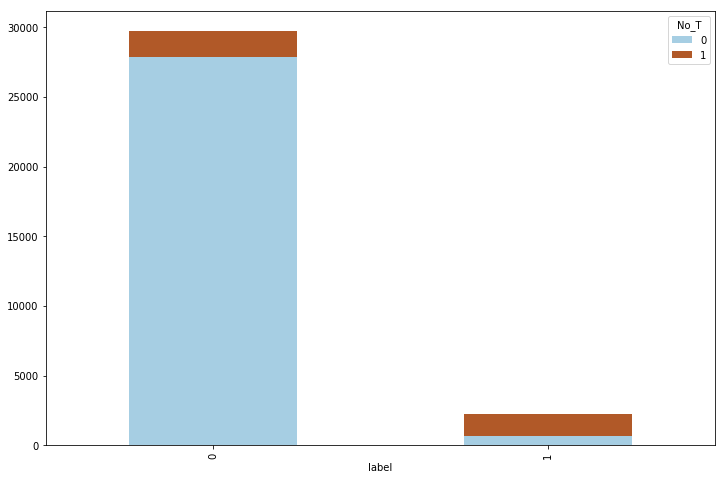

In [34]:
col=['NoEx','NoQues','NoHash','No_LSlang','ListLength','No_HW0','No_HW1','Positive Score','Negative Score','LexicalPopularity','LCUCF','No_T']
for i in col:
    crosstab=pd.crosstab(index=df['label'],values=df[i],columns=df[i],aggfunc=len)
    crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')